# See Data

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from ast import literal_eval
import seaborn as sns


Data = pd.read_csv('LeagueofLegends.csv')

In [85]:
Data.head()

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,golddiff,...,redMiddleChamp,goldredMiddle,redADC,redADCChamp,goldredADC,redSupport,redSupportChamp,goldredSupport,redBans,Address
0,NALCS,2015,Spring,Season,TSM,1,0,C9,40,"[0, 0, -14, -65, -268, -431, -488, -789, -494,...",...,Fizz,"[475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...",Sneaky,Sivir,"[475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...",LemonNation,Thresh,"[515, 515, 577, 722, 911, 1042, 1194, 1370, 14...","['Tristana', 'Leblanc', 'Nidalee']",http://matchhistory.na.leagueoflegends.com/en/...
1,NALCS,2015,Spring,Season,CST,0,1,DIG,38,"[0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...",...,Azir,"[475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...",CoreJJ,Corki,"[475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...",KiWiKiD,Annie,"[515, 515, 583, 752, 900, 1066, 1236, 1417, 15...","['RekSai', 'Janna', 'Leblanc']",http://matchhistory.na.leagueoflegends.com/en/...
2,NALCS,2015,Spring,Season,WFX,1,0,GV,40,"[0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...",...,Azir,"[475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...",Cop,Corki,"[475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...",BunnyFuFuu,Janna,"[515, 515, 584, 721, 858, 1002, 1168, 1303, 14...","['Leblanc', 'Zed', 'RekSai']",http://matchhistory.na.leagueoflegends.com/en/...
3,NALCS,2015,Spring,Season,TIP,0,1,TL,41,"[0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...",...,Lulu,"[475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...",KEITH,KogMaw,"[475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...",Xpecial,Janna,"[515, 515, 583, 721, 870, 1059, 1205, 1342, 15...","['RekSai', 'Rumble', 'LeeSin']",http://matchhistory.na.leagueoflegends.com/en/...
4,NALCS,2015,Spring,Season,CLG,1,0,T8,35,"[40, 40, 44, -36, 113, 158, -121, -191, 23, 20...",...,Lulu,"[475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...",Maplestreet8,Corki,"[475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...",Dodo8,Annie,"[475, 475, 538, 671, 817, 948, 1104, 1240, 136...","['Rumble', 'Sivir', 'Rengar']",http://matchhistory.na.leagueoflegends.com/en/...


In [90]:
print('Blue wins:', Data.bResult.sum())
print('Red wins:', Data.rResult.sum())

Blue wins: 4146
Red wins: 3474


Text(0.5, 1.0, "Win's timing")

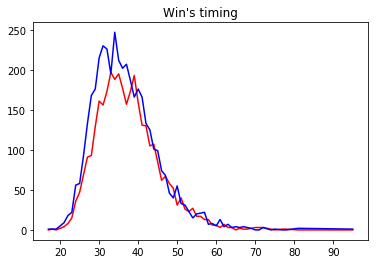

In [147]:
redWinsLength = Data.groupby('gamelength').rResult.sum()
blueWinsLength = Data.groupby('gamelength').bResult.sum()

plt.plot(redWinsLength.index, redWinsLength, 'r-')
plt.plot(blueWinsLength.index, blueWinsLength, 'b-')
plt.title("Win's timing")

C:\Users\asd84\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


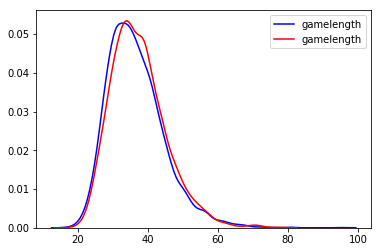

In [189]:
test = Data['bResult'] == 1
test = Data[test]

test_1 = Data['rResult'] == 1
test_1 = Data[test_1]

sns.kdeplot(test['gamelength'], color='b')
sns.kdeplot(test_1['gamelength'], color='r')


In [164]:
Min = redWinsLength.index
rWin_count = redWinsLength
bWin_count = blueWinsLength
b_minus_r = blueWinsLength - redWinsLength

win_dic = {"bWin count": blueWinsLength,
           "rWin count": redWinsLength,
           "b minus r": b_minus_r
          }
win_df = pd.DataFrame(win_dic)
win_df

,bWin count,rWin count,b minus r
gamelength,,,
17,1,0,1
18,1,1,0
19,1,0,1
20,5,2,3
21,9,4,5
22,18,8,10
23,22,15,7
24,56,36,20
25,58,47,11


# See gold in different role

In [65]:
def plotbtop(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldblueTop'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'b-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)

def plotbmid(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldblueMiddle'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'b-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)


def plotbadc(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldblueADC'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'b-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)

    
def plotbsup(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldblueSupport'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'b-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)

    
def plotbjg(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldblueJungle'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'b-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)

                
def plotrtop(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldredTop'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'r-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)

                
def plotrmid(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldredMiddle'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'r-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)



def plotradc(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldredADC'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'r-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)

    
def plotrsup(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldredSupport'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'r-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)

    
def plotrjg(x):
    for i in range(x):
        if (Data.gamelength[i] <= 40):
            if(Data.gamelength[i] != 49):
                b = Data['goldredJungle'][i]
                bg = np.array(literal_eval(b))
                t = np.arange(0., 1., 1/len(bg))
                plt.plot(t, bg, 'r-')
                plt.xlim((0, 1))
                plt.ylim((0, 24000))
                my_y_ticks = np.arange(0, 24000, 1000)
                plt.yticks(my_y_ticks)

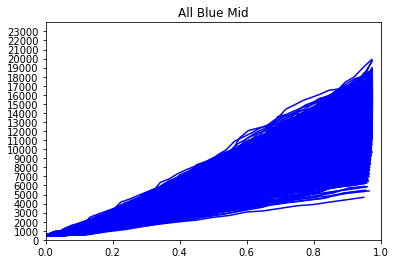

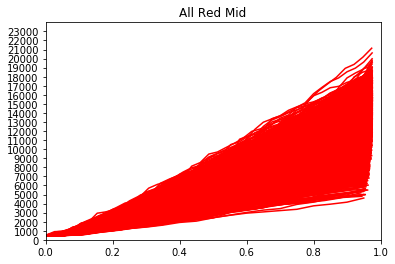

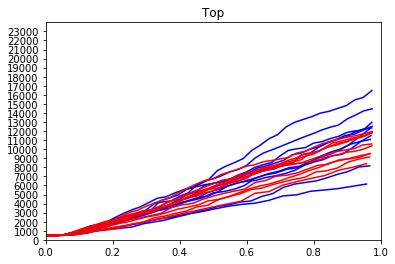

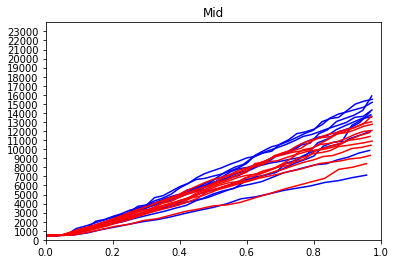

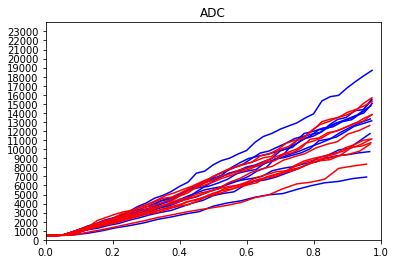

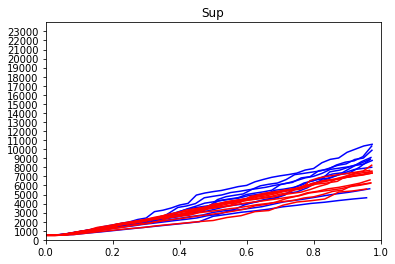

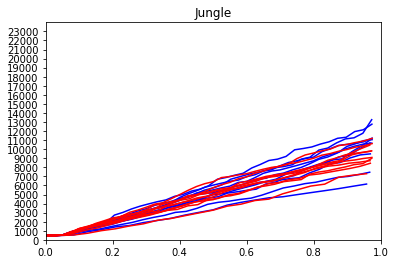

In [69]:
plt.title('All Blue Mid')
plt.show(plotbmid(len(Data)))
plt.title('All Red Mid')
plt.show(plotrmid(len(Data)))
plt.title('Top')
plt.show(plotbtop(15), plotrtop(15))
plt.title('Mid')
plt.show(plotbmid(15), plotrmid(15))
plt.title('ADC')
plt.show(plotbadc(15), plotradc(15))
plt.title('Sup')
plt.show(plotbsup(15), plotrsup(15))
plt.title('Jungle')
plt.show(plotbjg(15), plotrjg(15))

# See gold in different time

In [91]:
print(Data.gamelength.min())
print(Data.gamelength.max())

17
95


In [13]:
goldData = pd.read_csv('gold.csv')

minutes = ['min_' + str(x + 1) for x in range(81)]
goldData = pd.melt(goldData, id_vars=['Address', 'Type'], value_vars=minutes, 
                   var_name='minute', value_name='gold')

goldData.minute = goldData.minute.str.strip('min_').astype(int)
goldData.head()

,Address,Type,minute,gold
0,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
1,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
2,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
3,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,0.0
4,http://matchhistory.na.leagueoflegends.com/en/...,golddiff,1,40.0


Text(0.5, 1.0, "Team's average Gold in different time")

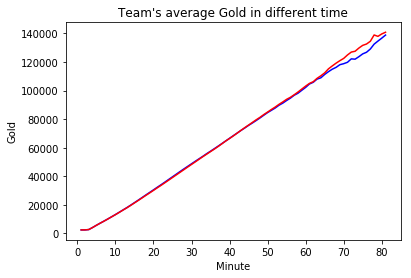

In [15]:
blueGold = goldData[goldData.Type == 'goldblue'].groupby('minute').gold.mean()
redGold = goldData[goldData.Type == 'goldred'].groupby('minute').gold.mean()

plt.plot(blueGold, 'b-')
plt.plot(redGold, 'r-')
plt.xlabel('Minute')
plt.ylabel('Gold')
plt.title("Team's average Gold in different time")

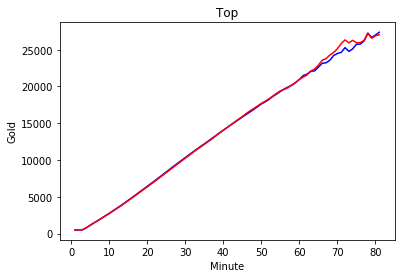

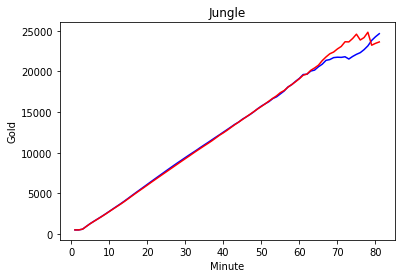

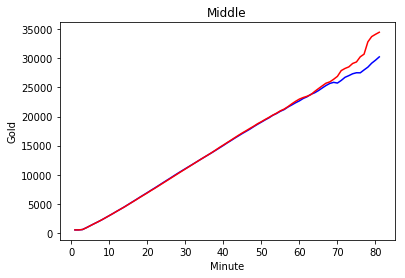

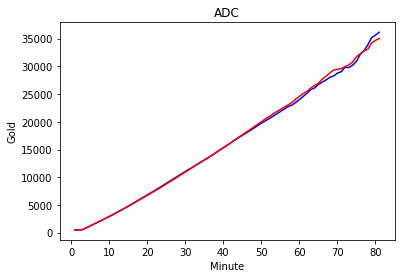

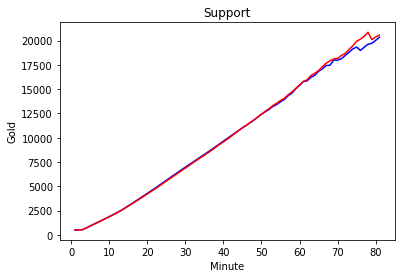

In [93]:
sections = ['Top', 'Jungle', 'Middle', 'ADC', 'Support']
num_sections = len(sections)

for i in range(num_sections):
    plt.figure(i)
    plt.plot(goldData[goldData.Type == 'goldblue' + sections[i]].groupby('minute').gold.mean(), 'b-')
    plt.plot(goldData[goldData.Type == 'goldred' + sections[i]].groupby('minute').gold.mean(), 'r-')
    plt.xlabel('Minute')
    plt.ylabel('Gold')
    plt.title(sections[i])

# Build new dataframe for logistic regression

In [73]:
Dragon = pd.read_csv('Dragons.csv')
Dragon_data = pd.read_csv('monsters.csv')

In [88]:
def numberDra(Dragon_data):
    gamename = list(set(Dragon_data['Address']))
    newframe = pd.DataFrame(np.zeros([len(gamename), 7]), columns=['Address', 'bDragons', 'rDragons', 'bFirst', 'bWin', 'bBaron', 'rBaron'])
    for i in range(len(gamename)):
        test = gamename[i] == Dragon_data['Address']
        test = Dragon_data[test]
        
        test_1 = gamename[i] == Data['Address']
        test_1 = Data[test_1]
        
        test_2 = gamename[i] == Dragon['Address']
        test_2 = Dragon[test_2]
        Time = test_2['Time'] == min(test_2['Time'],default = 0)
        FirstDra = test_2[Time]
        
        newframe.iloc[i,4] = int(test_1['bResult'])
        x = test['Team'].value_counts()
        y = FirstDra['Team'].value_counts()
        newframe.iloc[i,0] = gamename[i]
        if 'bDragons' in x.index:
            newframe.iloc[i,1] = x['bDragons']
        if 'rDragons' in x.index:
            newframe.iloc[i,2] = x['rDragons']
        if 'bDragons' in y.index:
            newframe.iloc[i,3] = 1
        if 'bBarons' in x.index:
            newframe.iloc[i,5] = x['bBarons']
        if 'rBarons' in x.index:
            newframe.iloc[i,6] = x['rBarons']
    return newframe

In [78]:
gamename = list(set(Dragon_data['Address']))
test = gamename[5] == Dragon_data['Address']
test = Dragon_data[test]
x = test['Team'].value_counts()
x

rDragons    3
rBarons     1
Name: Team, dtype: int64

In [89]:
numberDra(Dragon_data)

,Address,bDragons,rDragons,bFirst,bWin,bBaron,rBaron
0,http://matchhistory.na.leagueoflegends.com/en/...,2.0,0.0,1.0,0.0,0.0,2.0
1,http://matchhistory.na.leagueoflegends.com/en/...,0.0,3.0,0.0,0.0,1.0,1.0
2,http://matchhistory.euw.leagueoflegends.com/en...,2.0,0.0,1.0,1.0,1.0,0.0
3,http://matchhistory.na.leagueoflegends.com/en/...,1.0,0.0,1.0,1.0,1.0,0.0
4,http://matchhistory.na.leagueoflegends.com/en/...,4.0,1.0,1.0,1.0,1.0,0.0
5,http://matchhistory.lan.leagueoflegends.com/es...,0.0,3.0,0.0,0.0,0.0,1.0
6,http://matchhistory.na.leagueoflegends.com/en/...,2.0,2.0,1.0,0.0,0.0,2.0
7,http://matchhistory.na.leagueoflegends.com/en/...,3.0,2.0,1.0,0.0,0.0,1.0
8,http://matchhistory.na.leagueoflegends.com/en/...,3.0,1.0,0.0,0.0,0.0,1.0
9,http://matchhistory.na.leagueoflegends.com/en/...,4.0,1.0,1.0,1.0,0.0,1.0


In [90]:
print("Blue Dragon's Average kill: ", numberDra(Dragon_data)['bDragons'].mean())
print("Red Dragon's Average kill: ", numberDra(Dragon_data)['rDragons'].mean())
print("Blue Baron's Average kill: ", numberDra(Dragon_data)['bBaron'].mean())
print("Red Baron's Average kill: ", numberDra(Dragon_data)['rBaron'].mean())

Blue Dragon's Average kill:  1.8539370078740158
Red Dragon's Average kill:  1.9236220472440946
Blue Baron's Average kill:  0.7249343832020997
Red Baron's Average kill:  0.7311023622047244


# Training & Testing Data

In [91]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [92]:
X = numberDra(Dragon_data)

X_train, X_test, Y_train, Y_test = train_test_split(X.iloc[:,[1,2,5,6]], X.iloc[:,4], test_size = 0.2, random_state = 0)

# Logistic Regression (not use statsmodel)

In [93]:
logmodel = LogisticRegression()

logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
print(logmodel.coef_)

[[ 0.59042283 -0.57819553  1.46194824 -1.35353887]]


In [95]:
print(logmodel.intercept_ )

[0.32136216]


In [96]:
predictions = logmodel.predict(X_test)

In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
confusion_matrix(Y_test,predictions)

array([[630,  69],
       [ 74, 751]], dtype=int64)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(Y_test, predictions)

0.9061679790026247

# Logistic Regression (use statsmodel)

In [101]:
y = numberDra(Dragon_data)['bWin']

X = sm.add_constant(numberDra(Dragon_data)[['bDragons', 'rDragons', 'bBaron', 'rBaron']])

log_reg = sm.Logit(y, X)

C:\Users\asd84\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [102]:
result = log_reg.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.297890
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   bWin   No. Observations:                 7620
Model:                          Logit   Df Residuals:                     7615
Method:                           MLE   Df Model:                            4
Date:                Wed, 29 May 2019   Pseudo R-squ.:                  0.5678
Time:                        00:08:44   Log-Likelihood:                -2269.9
converged:                       True   LL-Null:                       -5252.1
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2833      0.112      2.526      0.012       0.064       0.503
bDragons       0.6154      0.

In [103]:
coefficients = result.params
coefficients

const       0.283258
bDragons    0.615367
rDragons   -0.572791
bBaron      1.529689
rBaron     -1.429934
dtype: float64

## 所以藍方優勢到底在哪裡?

BAN - PICK也是藍方先開始，較有選角上的優勢。

紅方可能只能相較被動的去尋找應對組合或戰術。

從地圖角度來看，紅方防禦Dragon較來的有優勢，但藍方防禦Baron卻較紅方來的容易。

而我們可以從Logistic Regression上發現，Baron的權重較Dragon的權重來的大。